In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression
from sklearn.preprocessing import LabelBinarizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Embedding, LSTM, SimpleRNN
from keras.applications import imagenet_utils, ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.datasets import mnist, cifar10, imdb
from scipy.sparse import csr_matrix
from scipy import interpolate
from tensorflow.keras.utils import to_categorical
from scipy.io import wavfile
from scipy.signal import spectrogram
from keras.models import load_model
from pydub import AudioSegment
import librosa

C:\Users\tneelapu\AppData\Roaming\Python\Python39\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [26]:
f = h5py.File('spectrograms.h5', 'r')
list(f.keys())

['amecro',
 'barswa',
 'bkcchi',
 'blujay',
 'daejun',
 'houfin',
 'mallar3',
 'norfli',
 'rewbla',
 'stejay',
 'wesmea',
 'whcspa']

In [27]:
for key in f.keys():
    dataset = f[key]
    print(f"Shape of {key}: {dataset.shape}")

Shape of amecro: (256, 343, 52)
Shape of barswa: (256, 343, 55)
Shape of bkcchi: (256, 343, 57)
Shape of blujay: (256, 343, 50)
Shape of daejun: (256, 343, 58)
Shape of houfin: (256, 343, 44)
Shape of mallar3: (256, 343, 36)
Shape of norfli: (256, 343, 59)
Shape of rewbla: (256, 343, 41)
Shape of stejay: (256, 343, 40)
Shape of wesmea: (256, 343, 36)
Shape of whcspa: (256, 343, 51)


### Binary Model (selected 3 pairs and choose the one that was giving a better accuracy)

#### mallar3,blujay

In [2]:
f = h5py.File('spectrograms.h5', 'r')

mallar3_data = f['mallar3'][:].transpose((2, 0, 1))
blujay_data = f['blujay'][:].transpose((2, 0, 1))

labels_mallar3 = np.zeros(mallar3_data.shape[0])
labels_blujay = np.ones(blujay_data.shape[0])

data = np.concatenate((mallar3_data, blujay_data), axis=0)
labels = np.concatenate((labels_mallar3, labels_blujay), axis=0)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop'
              , loss='binary_crossentropy'
              , metrics=['accuracy'])

history = model.fit(X_train, y_train
                      , epochs=20, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))

C:\Users\neela\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Accuracy: 94.44%


In [4]:
history = model.fit(X_train, y_train
                      , epochs=20, batch_size=32
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))

Test Accuracy: 94.44%


In [5]:
history = model.fit(X_train, y_train
                      , epochs=10, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))

Test Accuracy: 94.44%


In [7]:
history = model.fit(X_train, y_train
                      , epochs=60, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))

Test Accuracy: 94.44%


All the test accuracies are the same even after changing the batch size and epochs.

#### mallar3,wesmea

In [9]:
f = h5py.File('spectrograms.h5', 'r')

mallar3_data = f['mallar3'][:].transpose((2, 0, 1))
wesmea_data = f['wesmea'][:].transpose((2, 0, 1))

labels_mallar3 = np.zeros(mallar3_data.shape[0])
labels_wesmea = np.ones(wesmea_data.shape[0])

data = np.concatenate((mallar3_data, wesmea_data), axis=0)
labels = np.concatenate((labels_mallar3, labels_wesmea), axis=0)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop'
              , loss='binary_crossentropy'
              , metrics=['accuracy'])

history = model.fit(X_train, y_train
                      , epochs=10, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))

Test Accuracy: 93.33%


In [10]:
history = model.fit(X_train, y_train
                      , epochs=10, batch_size=8
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))

Test Accuracy: 93.33%


In [12]:
history = model.fit(X_train, y_train
                      , epochs=30, batch_size=250
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))

Test Accuracy: 93.33%


All the test accuracies are the same even after changing the batch size and epochs.

#### bkcchi,blujay

In [148]:
f = h5py.File('spectrograms.h5', 'r')

bkcchi_data = f['bkcchi'][:].transpose((2, 0, 1))
blujay_data = f['blujay'][:].transpose((2, 0, 1))

labels_bkcchi = np.zeros(bkcchi_data.shape[0])
labels_blujay = np.ones(blujay_data.shape[0])

data = np.concatenate((bkcchi_data, blujay_data), axis=0)
labels = np.concatenate((labels_bkcchi, labels_blujay), axis=0)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 95.45%


In [147]:
history = model.fit(X_train, y_train, epochs=20, batch_size=256
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 77.27%


In [149]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 95.45%


In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 95.45%


In [139]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 90.91%


In [140]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 95.45%


In [141]:
history = model.fit(X_train, y_train, epochs=60, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 95.45%


In [46]:
%%time

f = h5py.File('spectrograms.h5', 'r')

bkcchi_data = f['bkcchi'][:].transpose((2, 0, 1))
blujay_data = f['blujay'][:].transpose((2, 0, 1))

labels_bkcchi = np.zeros(bkcchi_data.shape[0])
labels_blujay = np.ones(blujay_data.shape[0])

data = np.concatenate((bkcchi_data, blujay_data), axis=0)
labels = np.concatenate((labels_bkcchi, labels_blujay), axis=0)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=128
                      , validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 95.45%
Wall time: 5.97 s


In [ ]:
model.save('spectrograms_model.h5')

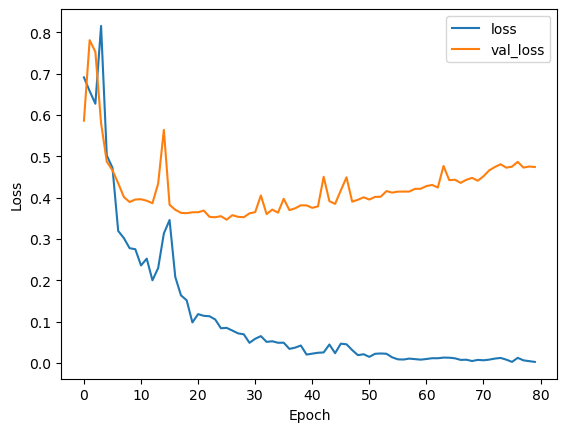

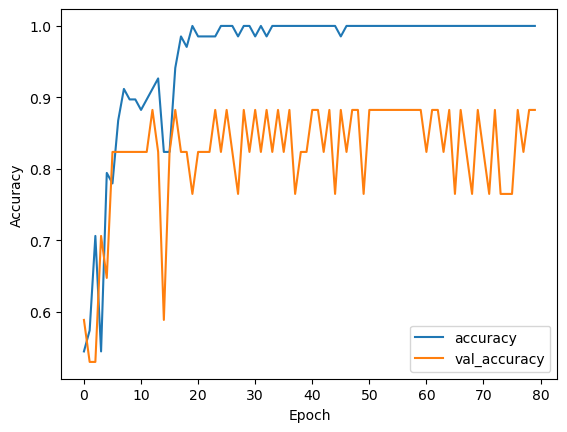

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

While having epochs=60, batch_size=128 the model achieved the maximum (95.45%) accuracy.

### Multi-class Model

In [6]:
f = h5py.File('spectrograms.h5', 'r')

data_list = []
labels_list = []

species_list = list(f.keys())

for species_key in f.keys():
    species_data = f[species_key][:].transpose((2, 0, 1))
    data_list.append(species_data)
    species_label = np.full((species_data.shape[0],), fill_value=species_list.index(species_key))
    labels_list.append(species_label)

X = np.concatenate(data_list, axis=0)
y = np.concatenate(labels_list, axis=0)

y_one_hot = to_categorical(y, num_classes=len(species_list))

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(species_list), activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 65.52%


In [28]:
model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(species_list), activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 63.79%


In [31]:
model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(species_list), activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 56.90%


In [32]:
model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(species_list), activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=40, batch_size=256, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 64.66%


In [33]:
model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(species_list), activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=256, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 67.24%


In [47]:
%%time

f = h5py.File('spectrograms.h5', 'r')

data_list = []
labels_list = []

species_list = list(f.keys())

for species_key in f.keys():
    species_data = f[species_key][:].transpose((2, 0, 1))
    data_list.append(species_data)
    species_label = np.full((species_data.shape[0],), fill_value=species_list.index(species_key))
    labels_list.append(species_label)

X = np.concatenate(data_list, axis=0)
y = np.concatenate(labels_list, axis=0)

y_one_hot = to_categorical(y, num_classes=len(species_list))

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(species_list), activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=256, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 64.66%
Wall time: 22.7 s


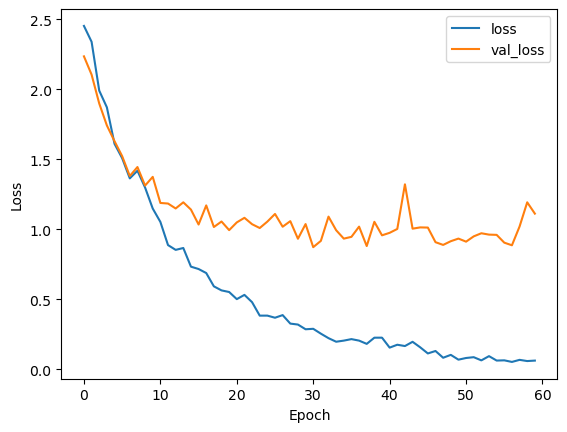

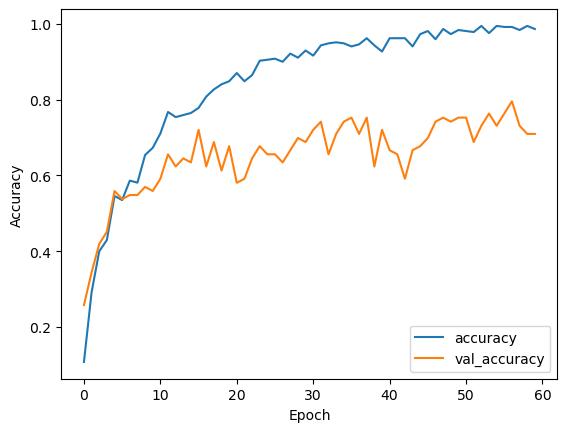

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

The best test accuracy was achieved when epochs=60, batch_size=256 which was 67.24%

### External Test data

In [33]:
%%time

f = h5py.File('spectrograms.h5', 'r')

data_list = []
labels_list = []

species_list = list(f.keys())

for species_key in f.keys():
    species_data = f[species_key][:].transpose((2, 0, 1))
    data_list.append(species_data)
    species_label = np.full((species_data.shape[0],), fill_value=species_list.index(species_key))
    labels_list.append(species_label)

X = np.concatenate(data_list, axis=0)
y = np.concatenate(labels_list, axis=0)

y_one_hot = to_categorical(y, num_classes=len(species_list))

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(species_list), activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=256, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

model.save('spectrograms_model.h5')

Test Accuracy: 66.38%
Wall time: 22.8 s


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
def load_and_convert_to_spectrogram(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db

def preprocess_spectrogram(spectrogram):
    resized_spectrogram = np.resize(spectrogram, (256, 343))
    mean = np.mean(resized_spectrogram)
    std = np.std(resized_spectrogram)
    normalized_spectrogram = (resized_spectrogram - mean) / std
    preprocessed_spectrogram = np.expand_dims(normalized_spectrogram, axis=-1)
    return preprocessed_spectrogram

model = load_model('spectrograms_model.h5')
audio_files = ["test_birds/test1.mp3", "test_birds/test2.mp3", "test_birds/test3.mp3"]

bird_species = ['amecro', 'barswa', 'bkcchi', 'blujay', 'daejun', 'houfin', 'mallar3', 'norfli', 'rewbla', 'stejay', 'wesmea', 'whcspa']

print("Results:")
print("=========")
print("| Audio File    | Predicted Bird Probabilities |")
print("|---------------|-------------------------------|")
for audio_file in audio_files:
    spectrogram = load_and_convert_to_spectrogram(audio_file)
    preprocessed_spectrogram = preprocess_spectrogram(spectrogram)
    prediction = model.predict(np.array([preprocessed_spectrogram]))[0]
    print(f"| {audio_file} |")
    for species, prob in zip(bird_species, prediction):
        print(f"|               | {species}: {prob:.4f}")

Results:
| Audio File    | Predicted Bird Probabilities |
|---------------|-------------------------------|
1/1 [==============================] - 0s 57ms/step
| test_birds/test1.mp3 |
|               | amecro: 0.0048
|               | barswa: 0.0000
|               | bkcchi: 0.0000
|               | blujay: 0.0000
|               | daejun: 0.0000
|               | houfin: 0.0000
|               | mallar3: 0.0000
|               | norfli: 0.0000
|               | rewbla: 0.0000
|               | stejay: 0.0000
|               | wesmea: 0.0000
|               | whcspa: 0.9952
1/1 [==============================] - 0s 24ms/step
| test_birds/test2.mp3 |
|               | amecro: 0.0000
|               | barswa: 0.0000
|               | bkcchi: 0.0000
|               | blujay: 0.9567
|               | daejun: 0.0000
|               | houfin: 0.0000
|               | mallar3: 0.0433
|               | norfli: 0.0000
|               | rewbla: 0.0000
|               | stejay: 0.0000
|         

#### Confusion Matrix for discussion

Test Accuracy: 61.11%
1/1 [==============================] - 0s 54ms/step


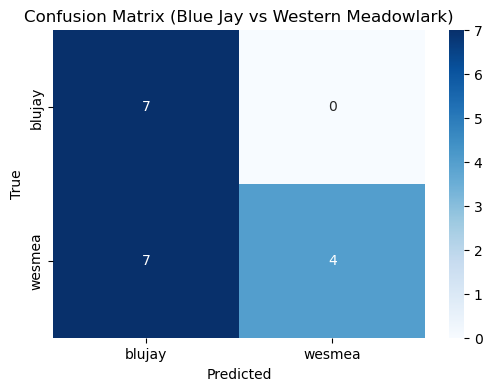

In [31]:
f = h5py.File('spectrograms.h5', 'r')
blujay_data = f['blujay'][:].transpose((2, 0, 1))
wesmea_data = f['wesmea'][:].transpose((2, 0, 1))

labels_blujay = np.zeros(blujay_data.shape[0])
labels_wesmea = np.ones(wesmea_data.shape[0])

data = np.concatenate((blujay_data, wesmea_data), axis=0)
labels = np.concatenate((labels_blujay, labels_wesmea), axis=0)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(256, 343)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(), loss=binary_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['blujay', 'wesmea'], yticklabels=['blujay', 'wesmea'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Blue Jay vs Western Meadowlark)')
plt.show()